In [11]:
import numpy as np
import pandas as pd


# Importing Data

In [12]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
crop.shape

(2200, 8)

In [14]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [15]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [16]:
crop.duplicated().sum()

0

In [17]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [18]:
corr = crop.select_dtypes(include=[float, int])
corr = corr.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [19]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

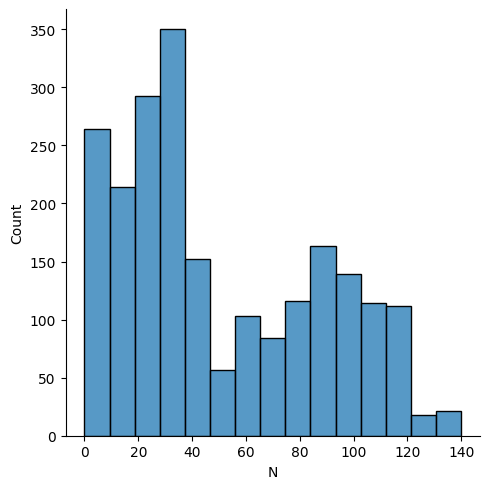

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(crop['N'])
plt.show()


# Encoding

In [21]:

crop_dict = {
    'rice'          : 1,
    'maize'         : 2,
    'jute'          : 3,
    'cotton'        : 4,
    'coconut'       : 5,
    'papaya'        : 6,
    'orange'        : 7,
    'apple'         : 8,
    'muskmelon'     : 9,
    'watermelon'    : 10,
    'grapes'        : 11,
    'mango'         : 12,
    'banana'        : 13,
    'pomegranate'   : 14,
    'lentil'        : 15,
    'blackgram'     : 16,
    'mungbean'      : 17,
    'mothbeans'     : 18,
    'pigeonpeas'    : 19,
    'kidneybeans'   : 20,
    'chickpea'      : 21,
    'coffee'        : 22
}
crop['crop_num'] = crop['label'].map(crop_dict)

In [22]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [23]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [24]:
x = crop.drop('crop_num',axis=1) #input
y = crop['crop_num']  #output

In [25]:
x.shape

(2200, 7)

In [26]:
y.shape

(2200,)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test , y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 
#20% data to test size

In [29]:
#train data
x_train.shape

(1760, 7)

In [30]:
#test data
x_test.shape

(440, 7)

# Scale the features using MinMaxScaler

In [31]:
from sklearn.preprocessing import MinMaxScaler #convert data in specific range
ms = MinMaxScaler()
ms.fit(x_train)
x_train = ms.transform(x_train)
x_test = ms.transform(x_test)

x_train

In [32]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standarization

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [34]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

# Training Model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

models = {
    'logistic regression':LogisticRegression(),
    'naive bayes':GaussianNB(),
    'support vector machine':SVC(),
    'k-nearest neighbors':KNeighborsClassifier(),
    'decision tree':DecisionTreeClassifier(),
    'random forest':RandomForestClassifier(),
    'bagging':BaggingClassifier(),
    'addboost':AdaBoostClassifier(),
    'gradient boosting':GradientBoostingClassifier(),
    'extra tress':ExtraTreeClassifier(),
}

for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)
    print(f"{name} with accuracy : {accuracy_score(y_test,ypred)}")

logistic regression with accuracy : 0.9636363636363636
naive bayes with accuracy : 0.9954545454545455
support vector machine with accuracy : 0.9681818181818181
k-nearest neighbors with accuracy : 0.9590909090909091
decision tree with accuracy : 0.9886363636363636
random forest with accuracy : 0.9931818181818182
bagging with accuracy : 0.9863636363636363


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


addboost with accuracy : 0.1409090909090909
gradient boosting with accuracy : 0.9818181818181818
extra tress with accuracy : 0.9045454545454545


# Exploring Data

In [36]:
rfc = GaussianNB()
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)
accuracy_score(y_test,ypred)

0.9954545454545455

In [37]:
def recomendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    prediction = rfc.predict(features).reshape(1,-1)
    
    return prediction[0]

In [39]:
N=int(input("Enter a value of Nitrogen--------"))
P=int(input("Enter a value of Phosphorus------"))
K=int(input("Enter a value of Potassium-------"))
temperature=int(input("Enter a value of Temperature-------"))
humidity=int(input("Enter a value of Humidity-------"))
ph=int(input("Enter a value of PH-------"))
rainfall=int(input("Enter a value of Rainfall-------"))


predict = recomendation(N,P,K,temperature,humidity,ph,rainfall)

crop_dict = {
           1   : 'rice',
            2 :'maize',
             3 :'jute',
            4: 'cotton',
           5:'coconut',
           6:'papaya' ,
            7:'orange',
             8:'apple',
        9:'muskmelon' ,
       10:'watermelon',
            11:'grapes',
             12:'mango',
            13:'banana',
      14:'pomegranate',
            15:'lentil',
       16:'blackgram',
          17:'mungbean',
        18:'mothbeans',
        19:'pigeonpeas',
       20:'kidneybeans',
         21:'chickpea' ,
           22:'coffee'
}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated".format(crop))
else:
    print("sorry are not able to recommedate")

Enter a value of Nitrogen-------- 28
Enter a value of Phosphorus------ 74
Enter a value of Potassium------- 81
Enter a value of Temperature------- 18
Enter a value of Humidity------- 18
Enter a value of PH------- 8
Enter a value of Rainfall------- 81


banana is a best crop to be cultivated


In [40]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))

In [41]:
import pickle
pickle.dump(sc,open('sc.pkl','wb'))